# Annotation Analysis
Nanyan "Rosalie" Zhu & Chen "Raphael" Liu

## 1. Import Packages

In [22]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
from skimage.transform import resize
from sklearn.metrics import classification_report, confusion_matrix
from skimage.morphology import convex_hull_image
from skimage.measure import label, regionprops
import warnings
from scipy.stats import pearsonr, spearmanr, sem
from scipy import stats
warnings.filterwarnings('once')

## 2. Setup Pathes

In [2]:
annotation_path = '/media/sail/SSD1T/Tal_cell_tracking/Nifti/annotation/'
model_prediction_path = '/media/sail/SSD1T/Tal_cell_tracking/Nifti/D4_Prediction_comparison/'

# load all the segmentation maps
manual_4img_withval_edge = nib.load(glob(model_prediction_path + 'cell_mask*4imgs_24patch_1val_downfactor1_edge.nii.gz')[0]).get_fdata()
manual_4img_withval_unet_edge = nib.load(glob(model_prediction_path + 'cell_mask*4imgs_24patch_1val_downfactor1_unet.nii.gz')[0]).get_fdata()
manual_4img_withval_unet = nib.load(glob(model_prediction_path + 'cell_mask*4imgs_24patch_1val_downfactor1_unet_edge.nii.gz')[0]).get_fdata()
manual_4img_withval = nib.load(glob(model_prediction_path + 'cell_mask*4imgs_24patch_1val_downfactor1_10epoch.nii.gz')[0]).get_fdata()
manual_4img_20epo = nib.load(glob(model_prediction_path + 'cell_mask*4imgs_20epoch.nii.gz')[0]).get_fdata()


# GT and img
D4_T2_annotation_img = nib.load(glob(annotation_path + '*RR_manual_annotation.nii.gz')[0]).get_fdata()
D4_T2_RGB = plt.imread(glob('/media/sail/SSD1T/Tal_cell_tracking/Cell_movie/D4/Combined3Channels/*T02.png')[0])

In [3]:
RR_seg_path = '/media/sail/SSD1T/Tal_cell_tracking/Cell_movie/D4/RRGroundTruthMask/D4_Mask_T02.png'
auto_pre = plt.imread(RR_seg_path)

## 3. Function

In [4]:
def plot_features(Properties_to_plot): 
    area_ResAtt_EE = Properties_to_plot[:, 0, 1]
    area_unet_EE = Properties_to_plot[:, 0, 2] 
    area_unet = Properties_to_plot[:, 0, 3]
    area_ResAtt = Properties_to_plot[:, 0, 4]

    Eccentricity_ResAtt_EE = Properties_to_plot[:, 1, 1]
    Eccentricity_unet_EE = Properties_to_plot[:, 1, 2] 
    Eccentricity_unet = Properties_to_plot[:, 1, 3]
    Eccentricity_ResAtt = Properties_to_plot[:, 1, 4]

    MAL_ResAtt_EE = Properties_to_plot[:, 2, 1]
    MAL_unet_EE = Properties_to_plot[:, 2, 2] 
    MAL_unet = Properties_to_plot[:, 2, 3]
    MAL_ResAtt = Properties_to_plot[:, 2, 4]

    Solidity_ResAtt_EE = Properties_to_plot[:, 3, 1]
    Solidity_unet_EE = Properties_to_plot[:, 3, 2] 
    Solidity_unet = Properties_to_plot[:, 3, 3]
    Solidity_ResAtt = Properties_to_plot[:, 3, 4]

    Orientation_ResAtt_EE = Properties_to_plot[:, 4, 1]
    Orientation_unet_EE = Properties_to_plot[:, 4, 2] 
    Orientation_unet = Properties_to_plot[:, 4, 3]
    Orientation_ResAtt = Properties_to_plot[:, 4, 4]

    MeanNuc_ResAtt_EE = Properties_to_plot[:, 5, 1]
    MeanNuc_unet_EE = Properties_to_plot[:, 5, 2] 
    MeanNuc_unet = Properties_to_plot[:, 5, 3]
    MeanNuc_ResAtt = Properties_to_plot[:, 5, 4]

    MeanCyto_ResAtt_EE = Properties_to_plot[:, 6, 1]
    MeanCyto_unet_EE = Properties_to_plot[:, 6, 2] 
    MeanCyto_unet = Properties_to_plot[:, 6, 3]
    MeanCyto_ResAtt = Properties_to_plot[:, 6, 4]

    MeanDIC_ResAtt_EE = Properties_to_plot[:, 7, 1]
    MeanDIC_unet_EE = Properties_to_plot[:, 7, 2] 
    MeanDIC_unet = Properties_to_plot[:, 7, 3]
    MeanDIC_ResAtt = Properties_to_plot[:, 7, 4]

    fig, ax = plt.subplots(1, 8, figsize = (40, 5))
    plt.rcParams.update({'font.size': 20})
    x1 = list(np.ones(np.size(area_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(area_unet_EE)) * 1)
    x3 = list(np.ones(np.size(area_unet)) * 2)
    x4 = list(np.ones(np.size(area_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(area_ResAtt_EE)) + list(abs(area_unet_EE)) + list(abs(area_unet)) + list(abs(area_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[0])
    #ax.set_ylim([-0.1, 1])
    ax[0].set_xticks([]);
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)

    x1 = list(np.ones(np.size(Eccentricity_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(Eccentricity_unet_EE)) * 1)
    x3 = list(np.ones(np.size(Eccentricity_unet)) * 2)
    x4 = list(np.ones(np.size(Eccentricity_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(Eccentricity_ResAtt_EE)) + list(abs(Eccentricity_unet_EE)) + list(abs(Eccentricity_unet)) + list(abs(Eccentricity_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[1])
    #ax.set_ylim([-0.1, 1])
    ax[1].set_xticks([]);
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)

    x1 = list(np.ones(np.size(MAL_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(MAL_unet_EE)) * 1)
    x3 = list(np.ones(np.size(MAL_unet)) * 2)
    x4 = list(np.ones(np.size(MAL_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(MAL_ResAtt_EE)) + list(abs(MAL_unet_EE)) + list(abs(MAL_unet)) + list(abs(MAL_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[2])
    #ax.set_ylim([-0.1, 1])
    ax[2].set_xticks([]);
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)

    x1 = list(np.ones(np.size(Solidity_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(Solidity_unet_EE)) * 1)
    x3 = list(np.ones(np.size(Solidity_unet)) * 2)
    x4 = list(np.ones(np.size(Solidity_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(Solidity_ResAtt_EE)) + list(abs(Solidity_unet_EE)) + list(abs(Solidity_unet)) + list(abs(Solidity_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[3])
    #ax.set_ylim([-0.1, 1])
    ax[3].set_xticks([]);
    ax[3].spines['top'].set_visible(False)
    ax[3].spines['right'].set_visible(False)

    x1 = list(np.ones(np.size(Orientation_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(Orientation_unet_EE)) * 1)
    x3 = list(np.ones(np.size(Orientation_unet)) * 2)
    x4 = list(np.ones(np.size(Orientation_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(Orientation_ResAtt_EE)) + list(abs(Orientation_unet_EE)) + list(abs(Orientation_unet)) + list(abs(Orientation_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[4])
    #ax.set_ylim([-0.1, 1])
    ax[4].set_xticks([]);
    ax[4].spines['top'].set_visible(False)
    ax[4].spines['right'].set_visible(False)

    x1 = list(np.ones(np.size(MeanNuc_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(MeanNuc_unet_EE)) * 1)
    x3 = list(np.ones(np.size(MeanNuc_unet)) * 2)
    x4 = list(np.ones(np.size(MeanNuc_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(MeanNuc_ResAtt_EE)) + list(abs(MeanNuc_unet_EE)) + list(abs(MeanNuc_unet)) + list(abs(MeanNuc_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[5])
    #ax.set_ylim([-0.1, 1])
    ax[5].set_xticks([]);
    ax[5].spines['top'].set_visible(False)
    ax[5].spines['right'].set_visible(False)

    x1 = list(np.ones(np.size(MeanCyto_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(MeanCyto_unet_EE)) * 1)
    x3 = list(np.ones(np.size(MeanCyto_unet)) * 2)
    x4 = list(np.ones(np.size(MeanCyto_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(MeanCyto_ResAtt_EE)) + list(abs(MeanCyto_unet_EE)) + list(abs(MeanCyto_unet)) + list(abs(MeanCyto_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[6])
    #ax.set_ylim([-0.1, 1])
    ax[6].set_xticks([]);
    ax[6].spines['top'].set_visible(False)
    ax[6].spines['right'].set_visible(False)

    x1 = list(np.ones(np.size(MeanDIC_ResAtt_EE)) * 0)
    x2 = list(np.ones(np.size(MeanDIC_unet_EE)) * 1)
    x3 = list(np.ones(np.size(MeanDIC_unet)) * 2)
    x4 = list(np.ones(np.size(MeanDIC_ResAtt))*3) 
    x_all = x1 + x2 + x3 + x4
    array_all = list(abs(MeanDIC_ResAtt_EE)) + list(abs(MeanDIC_unet_EE)) + list(abs(MeanDIC_unet)) + list(abs(MeanDIC_ResAtt))
    sns.barplot(x = x_all, y = array_all, capsize = .2, palette = ['firebrick', 'gray', 'gray', 'gray'], ci = 68, ax = ax[7])
    #ax.set_ylim([-0.1, 1])
    ax[7].set_xticks([]);
    ax[7].spines['top'].set_visible(False)
    ax[7].spines['right'].set_visible(False)

In [5]:
def compute_IOU(target, predic):
    return(np.logical_and(target, predic).sum() / np.logical_or(target, predic).sum())

In [6]:
def compute_DC(target, predic):
    return(np.logical_and(target, predic).sum() * 2 / (target.sum() + predic.sum()))

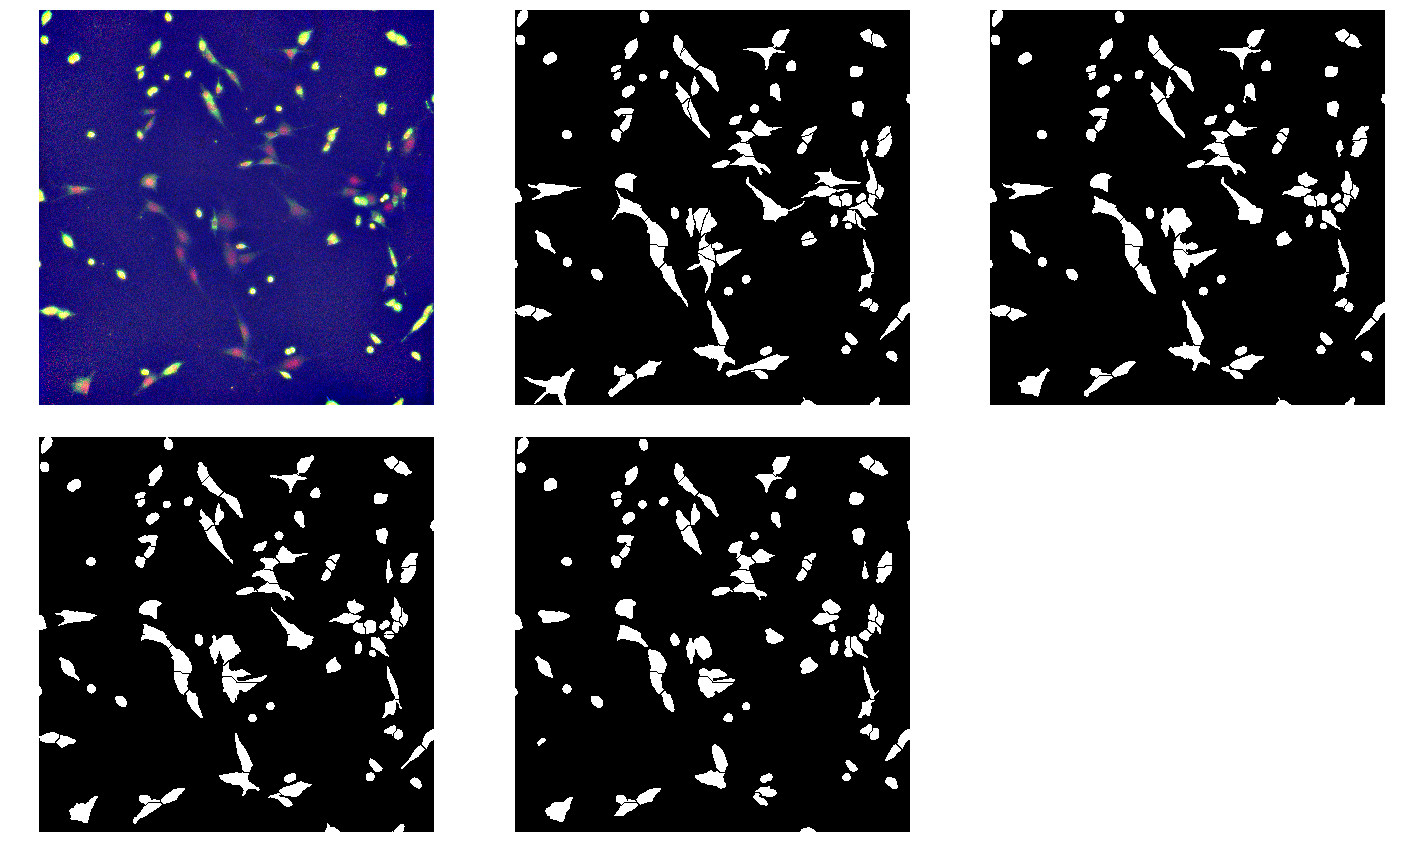

In [7]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.subplot(2, 3, 1)
plt.imshow(D4_T2_RGB[:1600, 1600:3200])
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(D4_T2_annotation_img[:1600, 1600:3200, 1], cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(manual_4img_withval_edge[:1600, 1600:3200, 1] > 0, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(manual_4img_withval_unet_edge[:1600, 1600:3200, 1] > 0, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(manual_4img_20epo[:1600, 1600:3200, 1] > 0, cmap = 'gray')
plt.axis('off')

#plt.imshow(annotation_img)
plt.tight_layout()

## Cell feature extraction

In [8]:
island_labelmap_GT = label(D4_T2_annotation_img[:1600, 1600:3200, 1])
properties_GT = regionprops(island_labelmap_GT)
island_labelmap_ResEE = label(manual_4img_withval_edge[:1600, 1600:3200, 1])
properties_ResEE = regionprops(island_labelmap_ResEE)
island_labelmap_Res= label(manual_4img_20epo[:1600, 1600:3200, 1])
properties_Res = regionprops(island_labelmap_Res)
island_labelmap_unetEE = label(manual_4img_withval_unet_edge[:1600, 1600:3200, 1])
properties_unetEE = regionprops(island_labelmap_unetEE)
island_labelmap_unet = label(manual_4img_withval_unet[:1600, 1600:3200, 1])
properties_unet = regionprops(island_labelmap_unet)

In [9]:
print(properties_GT[8].area, properties_GT[8].eccentricity, properties_GT[8].major_axis_length, \
properties_GT[8].solidity, properties_GT[8].orientation)
print(properties_ResEE[8].area, properties_ResEE[8].eccentricity, properties_ResEE[8].major_axis_length, \
properties_ResEE[8].solidity, properties_ResEE[8].orientation)
print(properties_Res[8].area, properties_Res[8].eccentricity, properties_Res[8].major_axis_length, \
properties_Res[8].solidity, properties_Res[8].orientation)
print(properties_unetEE[8].area, properties_unetEE[8].eccentricity, properties_unetEE[8].major_axis_length, \
properties_unetEE[8].solidity, properties_unetEE[8].orientation)
print(properties_unet[8].area, properties_unet[8].eccentricity, properties_unet[8].major_axis_length, \
properties_unet[8].solidity, properties_unet[8].orientation)

4203 0.7783070084985652 130.81179802204915 0.46694811687590265 -0.16676652482100435
4242 0.8260207196271804 136.1829245403824 0.4926257112995006 -0.14314433227561882
3488 0.5860815175201487 87.02789008907789 0.6859390363815142 -0.07957331825014838
3610 0.8684309101890565 127.76137882533747 0.5311948204826369 -0.13263456881854535
3972 0.8867558284692111 129.36000739365159 0.5939883355764917 -0.10300865709577572


/home/raphael/anaconda3/envs/Cyto/lib/python3.6/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


In [10]:
(properties_GT[8].area - properties_ResEE[8].area) / properties_GT[8].area * 100,\
(properties_GT[8].area - properties_unetEE[8].area) / properties_GT[8].area * 100,\
(properties_GT[8].area - properties_unet[8].area) / properties_GT[8].area * 100,\
(properties_GT[8].area - properties_Res[8].area) / properties_GT[8].area * 100

(-0.9279086366880799,
 14.108969783487984,
 5.496074232690935,
 17.011658339281468)

In [11]:
(properties_GT[8].eccentricity - properties_ResEE[8].eccentricity)/ properties_GT[8].eccentricity * 100,\
(properties_GT[8].eccentricity - properties_unetEE[8].eccentricity)/ properties_GT[8].eccentricity * 100,\
(properties_GT[8].eccentricity - properties_unet[8].eccentricity)/ properties_GT[8].eccentricity * 100,\
(properties_GT[8].eccentricity - properties_Res[8].eccentricity)/ properties_GT[8].eccentricity * 100

(-6.130448602879719,
 -11.579479653453163,
 -13.93393850838565,
 24.697900555879528)

In [12]:
(properties_GT[8].major_axis_length - properties_ResEE[8].major_axis_length)/ properties_GT[8].major_axis_length * 100,\
(properties_GT[8].major_axis_length - properties_unetEE[8].major_axis_length)/ properties_GT[8].major_axis_length * 100,\
(properties_GT[8].major_axis_length - properties_unet[8].major_axis_length)/ properties_GT[8].major_axis_length * 100,\
(properties_GT[8].major_axis_length - properties_Res[8].major_axis_length)/ properties_GT[8].major_axis_length * 100

(-4.105995483242206, 2.3319144319058327, 1.1098315674499422, 33.47091668718689)

In [13]:
(properties_GT[8].solidity - properties_ResEE[8].solidity)/ properties_GT[8].solidity * 100,\
(properties_GT[8].solidity - properties_unetEE[8].solidity)/ properties_GT[8].solidity * 100,\
(properties_GT[8].solidity - properties_unet[8].solidity)/ properties_GT[8].solidity * 100,\
(properties_GT[8].solidity - properties_Res[8].solidity)/ properties_GT[8].solidity * 100

(-5.499025158382233,
 -13.758852704359144,
 -27.206495563264376,
 -46.898340862955266)

In [14]:
(properties_GT[8].orientation - properties_ResEE[8].orientation)/ properties_GT[8].orientation * 100,\
(properties_GT[8].orientation - properties_unetEE[8].orientation)/ properties_GT[8].orientation * 100,\
(properties_GT[8].orientation - properties_unet[8].orientation)/ properties_GT[8].orientation * 100,\
(properties_GT[8].orientation - properties_Res[8].orientation)/ properties_GT[8].orientation * 100

(14.164828685337156, 20.466910873806285, 38.23181408478825, 52.284597681964726)

In [15]:
GT_Cyto_mean = D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_GT == 9].mean()
GT_Neuc_mean = D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_GT == 9].mean()
GT_DIC_mean = D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_GT == 9].mean()
GT_Cyto_mean = D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_GT == 9].mean()
print(GT_Cyto_mean, GT_Neuc_mean, GT_DIC_mean, GT_Cyto_mean)
print(np.array([(GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_ResEE == 9].mean()) / GT_Cyto_mean * 100,\
(GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unetEE == 9].mean()) / GT_Cyto_mean * 100,\
(GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unet == 9].mean()) / GT_Cyto_mean * 100,\
(GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_Res == 9].mean()) / GT_Cyto_mean * 100]))

print(np.array([(GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_ResEE == 9].mean()) / GT_Neuc_mean * 100,\
(GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unetEE == 9].mean()) / GT_Neuc_mean * 100,\
(GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unet == 9].mean()) / GT_Neuc_mean * 100,\
(GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_Res == 9].mean()) / GT_Neuc_mean * 100]))

print(np.array([(GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_ResEE == 9].mean()) / GT_DIC_mean * 100,\
(GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unetEE == 9].mean()) / GT_DIC_mean * 100,\
(GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unet == 9].mean()) / GT_DIC_mean * 100,\
(GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_Res == 9].mean()) / GT_DIC_mean * 100]))


0.2814815 0.2919698 0.47438294 0.2814815
[  0.5439837  -10.66396087  -4.65751439 -12.53714114]
[  0.50490559  -9.40653458  -3.97210084 -11.12727597]
[ 0.46220389 -0.11285585 -0.63092858 -0.44292971]


### Divide cells into 3 categories by their convexity

In [17]:
convexity_list = []
for cell_idx in range(island_labelmap_GT.max()):
    convexity_list.append((island_labelmap_GT[convex_hull_image(island_labelmap_GT == cell_idx)] == cell_idx).sum() / convex_hull_image(island_labelmap_GT == cell_idx).sum())

#### 1. Round Cells

In [17]:
round_list_GT = np.array(range(island_labelmap_GT.max()))[np.logical_and(np.array(convexity_list) != 1, np.array(convexity_list) > 0.95)]

In [18]:
round_list = np.int16(np.zeros((len(round_list_GT), 5)))
Res_EE_cell_list = []
unet_EE_cell_list = []
unet_cell_list = []
Res_cell_list = []
round_list[:, 0] = np.int16(round_list_GT)
for cell_idx in (round_list_GT - 1):
    Res_EE_cell_list.append(island_labelmap_ResEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_EE_cell_list.append(island_labelmap_unetEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_cell_list.append(island_labelmap_unet[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    Res_cell_list.append(island_labelmap_Res[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
round_list[:, 1] = np.int16(Res_EE_cell_list)
round_list[:, 2] = np.int16(unet_EE_cell_list)
round_list[:, 3] = np.int16(unet_cell_list)
round_list[:, 4] = np.int16(Res_cell_list)
round_list = round_list - 1

In [126]:
round_cell_properties = np.zeros((round_list.shape[0], 8, 5))
for cell_idx in range(round_list.shape[0]):
    cell_list = round_list[cell_idx]
    print('cell index: ', cell_idx)
    round_cell_properties[cell_idx, 0, :] = np.array([properties_GT[cell_list[0]].area,\
    (properties_GT[cell_list[0]].area - properties_ResEE[cell_list[1]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unetEE[cell_list[2]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unet[cell_list[3]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_Res[cell_list[4]].area) / properties_GT[cell_list[0]].area * 100])
    round_cell_properties[cell_idx, 1, :] = np.array([properties_GT[cell_list[0]].eccentricity, \
    (properties_GT[cell_list[0]].eccentricity - properties_ResEE[cell_list[1]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unetEE[cell_list[2]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unet[cell_list[3]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_Res[cell_list[4]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100])
    round_cell_properties[cell_idx, 2, :] = np.array([properties_GT[cell_list[0]].major_axis_length,\
    (properties_GT[cell_list[0]].major_axis_length - properties_ResEE[cell_list[1]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unetEE[cell_list[2]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unet[cell_list[3]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_Res[cell_list[4]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100])
    round_cell_properties[cell_idx, 3, :] = np.array([properties_GT[cell_list[0]].solidity,\
    (properties_GT[cell_list[0]].solidity - properties_ResEE[cell_list[1]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unetEE[cell_list[2]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unet[cell_list[3]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_Res[cell_list[4]].solidity) / properties_GT[cell_list[0]].solidity * 100])
    round_cell_properties[cell_idx, 4, :] = np.array([properties_GT[cell_list[0]].orientation,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation)]).min() / (np.pi/2) * 100,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation)]).min() / (np.pi/2) * 100])
    
    
    GT_Cyto_mean = D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_GT == (cell_list[0] + 1)].mean()
    round_cell_properties[cell_idx, 5, :] = np.array([GT_Cyto_mean,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Cyto_mean * 100])
    
    GT_Neuc_mean = D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_GT == (cell_list[0] + 1)].mean()
    round_cell_properties[cell_idx, 6, :] = np.array([GT_Neuc_mean,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Neuc_mean * 100])
    
    GT_DIC_mean = D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_GT == (cell_list[0] + 1)].mean()
    round_cell_properties[cell_idx, 7, :] = np.array([GT_DIC_mean,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_DIC_mean * 100])

cell index:  0
cell index:  1
cell index:  2
cell index:  3
cell index:  4
cell index:  5
cell index:  6
cell index:  7
cell index:  8
cell index:  9
cell index:  10
cell index:  11
cell index:  12
cell index:  13
cell index:  14
cell index:  15
cell index:  16
cell index:  17
cell index:  18
cell index:  19
cell index:  20
cell index:  21
cell index:  22
cell index:  23
cell index:  24
cell index:  25
cell index:  26
cell index:  27
cell index:  28
cell index:  29
cell index:  30
cell index:  31
cell index:  32


In [85]:

for metric in range(8):
    print(stats.ttest_rel(round_cell_properties[:, metric, 1], round_cell_properties[:, metric, 4]))

Ttest_relResult(statistic=1.6293325498059277, pvalue=0.11304895310402296)
Ttest_relResult(statistic=0.8867283735236235, pvalue=0.38184109999565186)
Ttest_relResult(statistic=1.6882343174890326, pvalue=0.10109037113752545)
Ttest_relResult(statistic=-4.188079093525259, pvalue=0.0002058873405671478)
Ttest_relResult(statistic=-1.020402248235963, pvalue=0.31519062269461295)
Ttest_relResult(statistic=-2.445171769402443, pvalue=0.020163778828218282)
Ttest_relResult(statistic=-2.442996567054485, pvalue=0.020266009925543005)
Ttest_relResult(statistic=1.517923911841732, pvalue=0.13885220266147646)


In [127]:
print(np.mean(abs(round_cell_properties), axis =0), '\n\n',\
sem(abs(round_cell_properties), axis =0))

[[1.37606061e+03 6.60579873e+00 1.68332405e+01 1.46303181e+01
  2.88194924e+01]
 [6.37908994e-01 1.09713047e+00 5.90224548e+00 4.94718780e+00
  1.71553658e+01]
 [4.97546540e+01 4.42876769e+00 1.34584279e+01 7.98223850e+00
  1.99180749e+01]
 [9.72129509e-01 1.15796197e+00 2.11683785e+00 1.82146184e+00
  4.65467148e+00]
 [8.14091751e-01 5.11897341e-01 4.08361093e+00 4.84948452e+00
  1.15275867e+01]
 [6.63827573e-01 1.56139221e+00 5.60205479e+00 6.21215387e+00
  1.52717864e+01]
 [5.75492174e-01 1.47961895e+00 5.45992802e+00 6.11420316e+00
  1.48975951e+01]
 [4.95047520e-01 3.77926727e-01 9.32349730e-01 9.29052987e-01
  1.80333206e+00]] 

 [[9.04342736e+01 6.08235868e+00 1.04551499e+01 6.50312672e+00
  1.05239874e+01]
 [3.66836798e-02 6.39920594e-01 1.26265206e+00 9.34837628e-01
  4.22051622e+00]
 [2.01354583e+00 4.27893805e+00 1.04035500e+01 4.56759874e+00
  8.87404323e+00]
 [1.65059120e-03 1.05483997e+00 1.45169033e+00 9.71401196e-01
  9.21903171e-01]
 [7.98586676e-02 3.44582125e-01 8.37

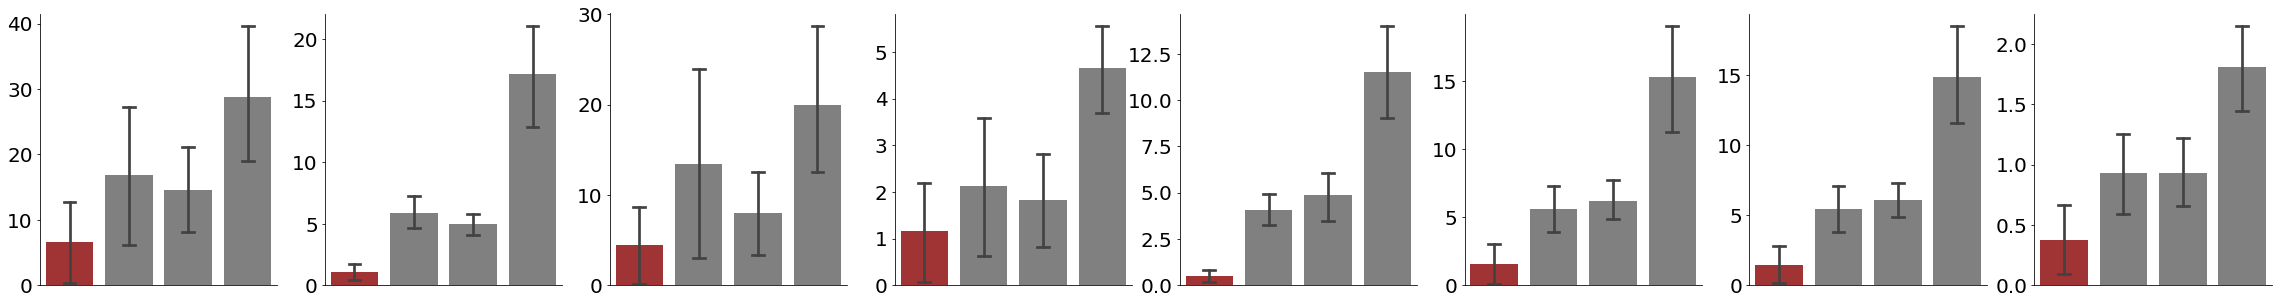

In [128]:
plot_features(round_cell_properties)

#### 2. needle cells

In [18]:
needle_list_GT = np.array(range(island_labelmap_GT.max()))[np.logical_and(np.array(convexity_list) < 0.9, np.array(convexity_list) > 0.8)]
needle_list_GT_area = np.array([(island_labelmap_GT == cell_idx).sum() for cell_idx in needle_list_GT])
needle_list_GT = needle_list_GT[np.logical_and(needle_list_GT_area > 30 , needle_list_GT_area < 5000)]

In [19]:
needle_list = np.int16(np.zeros((len(needle_list_GT), 5)))
Res_EE_cell_list = []
unet_EE_cell_list = []
unet_cell_list = []
Res_cell_list = []
needle_list[:, 0] = np.int16(needle_list_GT)
for cell_idx in (needle_list_GT - 1):
    Res_EE_cell_list.append(island_labelmap_ResEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_EE_cell_list.append(island_labelmap_unetEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_cell_list.append(island_labelmap_unet[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    Res_cell_list.append(island_labelmap_Res[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
needle_list[:, 1] = np.int16(Res_EE_cell_list)
needle_list[:, 2] = np.int16(unet_EE_cell_list)
needle_list[:, 3] = np.int16(unet_cell_list)
needle_list[:, 4] = np.int16(Res_cell_list)
needle_list = needle_list - 1

In [26]:
needle_cell_properties = np.zeros((needle_list.shape[0], 8, 5))
for cell_idx in range(needle_list.shape[0]):
    cell_list = needle_list[cell_idx]
    print('cell index: ', cell_idx)
    needle_cell_properties[cell_idx, 0, :] = np.array([properties_GT[cell_list[0]].area,\
    (properties_GT[cell_list[0]].area - properties_ResEE[cell_list[1]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unetEE[cell_list[2]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unet[cell_list[3]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_Res[cell_list[4]].area) / properties_GT[cell_list[0]].area * 100])
    needle_cell_properties[cell_idx, 1, :] = np.array([properties_GT[cell_list[0]].eccentricity, \
    (properties_GT[cell_list[0]].eccentricity - properties_ResEE[cell_list[1]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unetEE[cell_list[2]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unet[cell_list[3]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_Res[cell_list[4]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100])
    needle_cell_properties[cell_idx, 2, :] = np.array([properties_GT[cell_list[0]].major_axis_length,\
    (properties_GT[cell_list[0]].major_axis_length - properties_ResEE[cell_list[1]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unetEE[cell_list[2]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unet[cell_list[3]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_Res[cell_list[4]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100])
    needle_cell_properties[cell_idx, 3, :] = np.array([properties_GT[cell_list[0]].solidity,\
    (properties_GT[cell_list[0]].solidity - properties_ResEE[cell_list[1]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unetEE[cell_list[2]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unet[cell_list[3]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_Res[cell_list[4]].solidity) / properties_GT[cell_list[0]].solidity * 100])
    needle_cell_properties[cell_idx, 4, :] = np.array([properties_GT[cell_list[0]].orientation,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation)]).min() / (np.pi/2) * 100,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation)]).min() / (np.pi/2) * 100])
    
    
    
    GT_Cyto_mean = D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_GT == (cell_list[0] + 1)].mean()
    needle_cell_properties[cell_idx, 5, :] = np.array([GT_Cyto_mean,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Cyto_mean * 100])
    
    GT_Neuc_mean = D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_GT == (cell_list[0] + 1)].mean()
    needle_cell_properties[cell_idx, 6, :] = np.array([GT_Neuc_mean,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Neuc_mean * 100])
    
    GT_DIC_mean = D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_GT == (cell_list[0] + 1)].mean()
    needle_cell_properties[cell_idx, 7, :] = np.array([GT_DIC_mean,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_DIC_mean * 100])
                                                       

cell index:  0
cell index:  1
cell index:  2
cell index:  3
cell index:  4
cell index:  5
cell index:  6
cell index:  7
cell index:  8
cell index:  9
cell index:  10
cell index:  11
cell index:  12
cell index:  13
cell index:  14
cell index:  15
cell index:  16
cell index:  17
cell index:  18
cell index:  19
cell index:  20
cell index:  21
cell index:  22


In [27]:
for metric in range(8):
    print(stats.ttest_rel(needle_cell_properties[:, metric, 1], needle_cell_properties[:, metric, 4]))

Ttest_relResult(statistic=-2.0664664420997574, pvalue=0.050754630185028564)
Ttest_relResult(statistic=-0.2898078119916137, pvalue=0.7746771173856934)
Ttest_relResult(statistic=-1.7446832625799265, pvalue=0.09499601979003017)
Ttest_relResult(statistic=0.04518233371994567, pvalue=0.9643695919328805)
Ttest_relResult(statistic=-1.4158192369332212, pvalue=0.17083077049093917)
Ttest_relResult(statistic=1.1764564433535134, pvalue=0.25198572945785674)
Ttest_relResult(statistic=1.458098164366651, pvalue=0.15894245325348566)
Ttest_relResult(statistic=-0.45407173104701276, pvalue=0.6542251693814275)


In [28]:
print(np.mean(abs(needle_cell_properties), axis =0), '\n\n',\
sem(abs(needle_cell_properties), axis =0))

[[2.37860870e+03 4.63999246e+01 4.73612148e+01 5.42068885e+01
  4.25119650e+01]
 [8.32659900e-01 9.98377749e+00 1.06994135e+01 1.35540098e+01
  1.36043601e+01]
 [8.41132775e+01 1.37953006e+01 1.48113611e+01 2.02851114e+01
  1.55134879e+01]
 [8.60997270e-01 2.61583538e+00 3.95541190e+00 4.76820031e+00
  5.58443366e+00]
 [8.82782498e-01 2.17195493e+01 2.22538288e+01 2.24217255e+01
  2.74476328e+01]
 [4.39134400e-01 6.82043461e+00 9.40576750e+00 1.03244977e+01
  1.40359954e+01]
 [4.00811190e-01 3.09325959e+00 5.55657326e+00 6.41636656e+00
  1.07657720e+01]
 [4.79002452e-01 6.20859377e-01 8.33411418e-01 1.18735348e+00
  1.62839098e+00]] 

 [[2.14338662e+02 1.90949940e+01 1.71065827e+01 1.88357123e+01
  1.13412702e+01]
 [2.60384591e-02 3.55554675e+00 3.40480078e+00 3.65755419e+00
  3.01288702e+00]
 [5.64117277e+00 7.28297926e+00 4.80621534e+00 9.10823805e+00
  4.27518515e+00]
 [5.53654612e-03 7.71590622e-01 6.66624876e-01 1.08166977e+00
  1.18104622e+00]
 [1.10322233e-01 7.40813142e+00 7.30

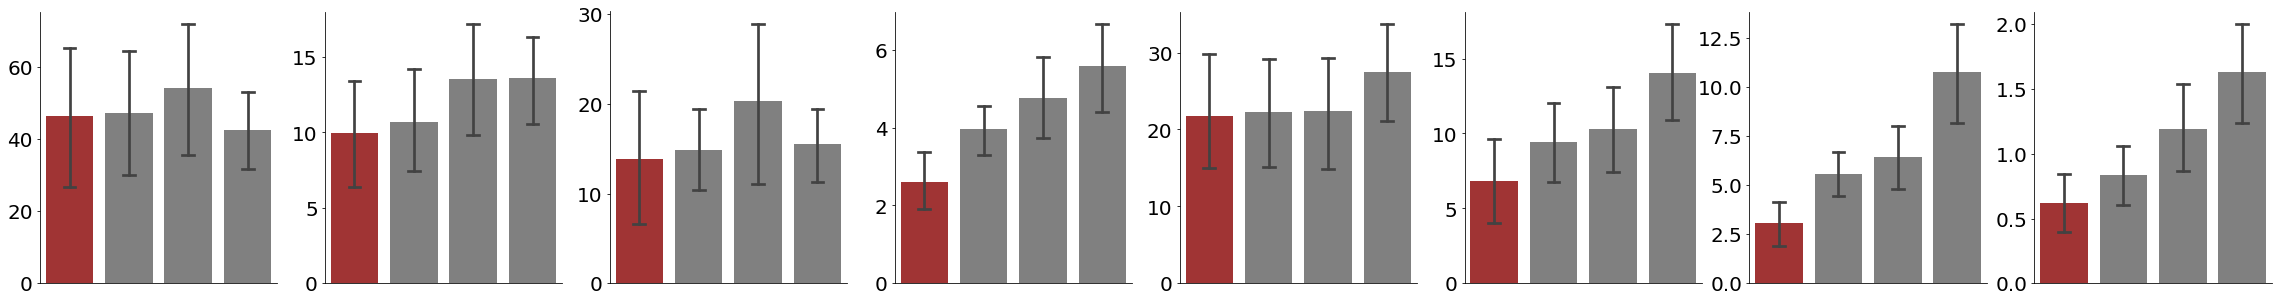

In [29]:
plot_features(needle_cell_properties)

#### 3. Star cells

In [28]:
star_list = np.array([[9, 9, 9, 9, 9], [113, 93, 93, 93, 89], [55, 47, 48, 48, 46], [54, 46, 46, 46, 53]]) - 1

In [129]:
star_cell_properties = np.zeros((star_list.shape[0], 8, 5))
    
for cell_idx in range(star_list.shape[0]):
    cell_list = star_list[cell_idx]
    print('cell index: ', cell_idx)
    star_cell_properties[cell_idx, 0, :] = np.array([properties_GT[cell_list[0]].area,\
    (properties_GT[cell_list[0]].area - properties_ResEE[cell_list[1]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unetEE[cell_list[2]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unet[cell_list[3]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_Res[cell_list[4]].area) / properties_GT[cell_list[0]].area * 100])
    star_cell_properties[cell_idx, 1, :] = np.array([properties_GT[cell_list[0]].eccentricity, \
    (properties_GT[cell_list[0]].eccentricity - properties_ResEE[cell_list[1]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unetEE[cell_list[2]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unet[cell_list[3]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_Res[cell_list[4]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100])
    star_cell_properties[cell_idx, 2, :] = np.array([properties_GT[cell_list[0]].major_axis_length,\
    (properties_GT[cell_list[0]].major_axis_length - properties_ResEE[cell_list[1]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unetEE[cell_list[2]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unet[cell_list[3]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_Res[cell_list[4]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100])
    star_cell_properties[cell_idx, 3, :] = np.array([properties_GT[cell_list[0]].solidity,\
    (properties_GT[cell_list[0]].solidity - properties_ResEE[cell_list[1]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unetEE[cell_list[2]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unet[cell_list[3]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_Res[cell_list[4]].solidity) / properties_GT[cell_list[0]].solidity * 100])
    star_cell_properties[cell_idx, 4, :] = np.array([properties_GT[cell_list[0]].orientation,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation)]).min() / (np.pi/2) * 100,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation)]).min() / (np.pi/2) * 100])
    
    
    GT_Cyto_mean = D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_GT == (cell_list[0] + 1)].mean()
    star_cell_properties[cell_idx, 5, :] = np.array([GT_Cyto_mean,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Cyto_mean * 100])
    
    GT_Neuc_mean = D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_GT == (cell_list[0] + 1)].mean()
    star_cell_properties[cell_idx, 6, :] = np.array([GT_Neuc_mean,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Neuc_mean * 100])
    
    GT_DIC_mean = D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_GT == (cell_list[0] + 1)].mean()
    star_cell_properties[cell_idx, 7, :] = np.array([GT_DIC_mean,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_DIC_mean * 100])

cell index:  0
cell index:  1
cell index:  2
cell index:  3


In [130]:
for metric in range(8):
    print(stats.ttest_rel(star_cell_properties[:, metric, 1], star_cell_properties[:, metric, 4]))

Ttest_relResult(statistic=-2.0765445104650055, pvalue=0.12942931936841043)
Ttest_relResult(statistic=-2.1833171428272053, pvalue=0.1169845657985269)
Ttest_relResult(statistic=-2.776324646841356, pvalue=0.0692023580225171)
Ttest_relResult(statistic=3.452235702317979, pvalue=0.04087015468157262)
Ttest_relResult(statistic=0.040041009808358716, pvalue=0.970576127698211)
Ttest_relResult(statistic=2.3859324016050825, pvalue=0.09709672588101605)
Ttest_relResult(statistic=2.1281350296350716, pvalue=0.12322862213286866)
Ttest_relResult(statistic=1.5927518856460006, pvalue=0.20946245038625128)


In [131]:
print(np.mean(abs(star_cell_properties), axis =0), '\n\n',\
sem(abs(star_cell_properties), axis =0))

[[7.24875000e+03 9.98811010e+00 1.53941375e+01 1.15070807e+01
  3.42528940e+01]
 [8.29425448e-01 6.35252324e+00 7.11385775e+00 7.60589484e+00
  1.37980347e+01]
 [1.78028047e+02 8.90974202e+00 1.48718465e+01 1.02613036e+01
  3.99141585e+01]
 [4.98983065e-01 3.94972653e+01 4.48241986e+01 3.94324490e+01
  7.74797369e+01]
 [2.61178469e-01 1.15350778e+01 1.17513068e+01 1.27832776e+01
  1.14384452e+01]
 [2.52368487e-01 9.83682104e+00 1.63620587e+01 1.08985185e+01
  2.86305957e+01]
 [2.80470986e-01 7.42107128e+00 1.29759847e+01 8.28043388e+00
  2.67145736e+01]
 [4.75683518e-01 2.72240920e-01 2.32162110e-01 3.22855884e-01
  3.39268520e-01]] 

 [[1.22721849e+03 6.79055875e+00 6.80108533e+00 6.11701522e+00
  9.82971773e+00]
 [5.21274349e-02 2.28082805e+00 2.55531490e+00 3.17207856e+00
  5.49754155e+00]
 [1.80930798e+01 5.86054542e+00 5.62725835e+00 5.74979011e+00
  8.02765787e+00]
 [6.62751829e-02 1.96261956e+01 1.94369449e+01 1.81735758e+01
  2.31619957e+01]
 [1.31095462e-01 6.82969124e+00 7.39

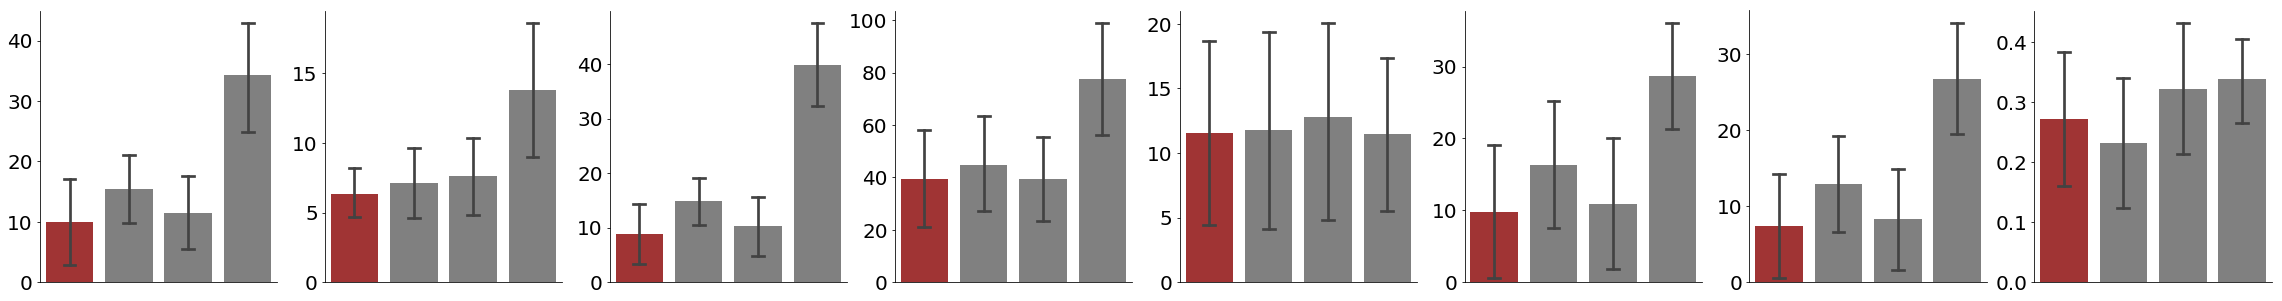

In [132]:
plot_features(star_cell_properties)

### 4. others

In [32]:
other_list_GT1 = np.array(range(island_labelmap_GT.max()))[np.logical_and(np.array(convexity_list) < 0.8, np.array(convexity_list) > 0.5)]
other_list_GT2 = np.array(range(island_labelmap_GT.max()))[np.logical_and(np.array(convexity_list) < 0.95, np.array(convexity_list) > 0.9)]
other_list_GT = np.concatenate((other_list_GT1, other_list_GT2))
other_list_GT_area = np.array([(island_labelmap_GT == cell_idx).sum() for cell_idx in other_list_GT])
other_list_GT = other_list_GT[np.logical_and(other_list_GT_area > 30 , other_list_GT_area < 5000)]

In [33]:
bad_list = [0, 6, 7, 8, 10, 19, 21, 26, 27, 28]
other_list_GT = np.delete(other_list_GT, bad_list, None)

In [34]:
other_list = np.int16(np.zeros((len(other_list_GT), 5)))
Res_EE_cell_list = []
unet_EE_cell_list = []
unet_cell_list = []
Res_cell_list = []
other_list[:, 0] = np.int16(other_list_GT)
for cell_idx in (other_list_GT - 1):
    Res_EE_cell_list.append(island_labelmap_ResEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_EE_cell_list.append(island_labelmap_unetEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_cell_list.append(island_labelmap_unet[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    Res_cell_list.append(island_labelmap_Res[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
other_list[:, 1] = np.int16(Res_EE_cell_list)
other_list[:, 2] = np.int16(unet_EE_cell_list)
other_list[:, 3] = np.int16(unet_cell_list)
other_list[:, 4] = np.int16(Res_cell_list)
other_list = other_list - 1

In [35]:
other_cell_properties = np.zeros((other_list.shape[0], 8, 5))
for cell_idx in range(other_list.shape[0]):
    cell_list = other_list[cell_idx]
    print('cell index: ', cell_idx)
    other_cell_properties[cell_idx, 0, :] = np.array([properties_GT[cell_list[0]].area,\
    (properties_GT[cell_list[0]].area - properties_ResEE[cell_list[1]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unetEE[cell_list[2]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unet[cell_list[3]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_Res[cell_list[4]].area) / properties_GT[cell_list[0]].area * 100])
    other_cell_properties[cell_idx, 1, :] = np.array([properties_GT[cell_list[0]].eccentricity, \
    (properties_GT[cell_list[0]].eccentricity - properties_ResEE[cell_list[1]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unetEE[cell_list[2]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unet[cell_list[3]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_Res[cell_list[4]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100])
    other_cell_properties[cell_idx, 2, :] = np.array([properties_GT[cell_list[0]].major_axis_length,\
    (properties_GT[cell_list[0]].major_axis_length - properties_ResEE[cell_list[1]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unetEE[cell_list[2]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unet[cell_list[3]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_Res[cell_list[4]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100])
    other_cell_properties[cell_idx, 3, :] = np.array([properties_GT[cell_list[0]].solidity,\
    (properties_GT[cell_list[0]].solidity - properties_ResEE[cell_list[1]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unetEE[cell_list[2]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unet[cell_list[3]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_Res[cell_list[4]].solidity) / properties_GT[cell_list[0]].solidity * 100])
    other_cell_properties[cell_idx, 4, :] = np.array([properties_GT[cell_list[0]].orientation,\
    (properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation) / properties_GT[cell_list[0]].orientation * 100,\
    (properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation) / properties_GT[cell_list[0]].orientation * 100,\
    (properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation) / properties_GT[cell_list[0]].orientation * 100,\
    (properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation) / properties_GT[cell_list[0]].orientation * 100])
    
    
    GT_Cyto_mean = D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_GT == (cell_list[0] + 1)].mean()
    other_cell_properties[cell_idx, 5, :] = np.array([GT_Cyto_mean,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Cyto_mean * 100])
    
    GT_Neuc_mean = D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_GT == (cell_list[0] + 1)].mean()
    other_cell_properties[cell_idx, 6, :] = np.array([GT_Neuc_mean,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Neuc_mean * 100])
    
    GT_DIC_mean = D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_GT == (cell_list[0] + 1)].mean()
    other_cell_properties[cell_idx, 7, :] = np.array([GT_DIC_mean,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_DIC_mean * 100])
                                                       

cell index:  0
cell index:  1
cell index:  2
cell index:  3
cell index:  4
cell index:  5
cell index:  6
cell index:  7
cell index:  8
cell index:  9
cell index:  10
cell index:  11
cell index:  12
cell index:  13
cell index:  14
cell index:  15
cell index:  16
cell index:  17
cell index:  18
cell index:  19
cell index:  20
cell index:  21
cell index:  22
cell index:  23


In [36]:
for metric in range(8):
    print(stats.ttest_rel(other_cell_properties[:, metric, 1], other_cell_properties[:, metric, 4]))

Ttest_relResult(statistic=-1.402240138915523, pvalue=0.17419676677608767)
Ttest_relResult(statistic=1.2165347563894504, pvalue=0.23611862533948313)
Ttest_relResult(statistic=-0.5046804119309802, pvalue=0.6185845850120322)
Ttest_relResult(statistic=0.6098554092287046, pvalue=0.5479360591596255)
Ttest_relResult(statistic=0.24972304963172792, pvalue=0.8050184069221995)
Ttest_relResult(statistic=-0.9893273621694937, pvalue=0.3327974458399974)
Ttest_relResult(statistic=-0.6983685234630195, pvalue=0.4919481379879219)
Ttest_relResult(statistic=0.4126529887271269, pvalue=0.6836822211910589)


In [37]:
print(np.mean(abs(other_cell_properties), axis =0), '\n\n',\
sem(abs(other_cell_properties), axis =0))

[[2.43325000e+03 6.12176812e+00 9.65682951e+00 1.21931620e+01
  2.10816018e+01]
 [8.30037349e-01 4.18017560e+00 5.45939634e+00 7.54939080e+00
  1.40600610e+01]
 [8.66471815e+01 7.36202735e+00 9.77805004e+00 1.25705894e+01
  1.71222128e+01]
 [8.78363701e-01 4.13298690e+00 4.43226388e+00 4.82641577e+00
  5.77690001e+00]
 [8.57468143e-01 2.24886961e+01 2.54827825e+01 2.54950150e+01
  3.15032482e+01]
 [5.27358452e-01 3.12810785e+00 5.45568104e+00 6.75841198e+00
  1.75419848e+01]
 [4.46022414e-01 3.03396011e+00 5.61622211e+00 6.85436121e+00
  1.75973160e+01]
 [4.73747641e-01 3.82077223e-01 6.67585385e-01 6.50393654e-01
  1.61226070e+00]] 

 [[2.26252714e+02 2.33723276e+00 2.45903777e+00 2.79814272e+00
  3.79275703e+00]
 [2.93591054e-02 1.63477714e+00 1.72165910e+00 2.03798761e+00
  6.65316796e+00]
 [8.05001798e+00 2.66398789e+00 2.66596645e+00 2.76083967e+00
  3.22175114e+00]
 [1.81355325e-02 1.41850801e+00 1.04206492e+00 1.30195733e+00
  1.45741108e+00]
 [9.30162126e-02 1.22239980e+01 1.13

#### Combine others and spindle-shaped cells

In [134]:
Middle_Class_GT = np.sort(list(other_list_GT) + list(needle_list_GT))

In [135]:
Middle_Class_list = np.int16(np.zeros((len(Middle_Class_GT), 5)))
Res_EE_cell_list = []
unet_EE_cell_list = []
unet_cell_list = []
Res_cell_list = []
Middle_Class_list[:, 0] = np.int16(Middle_Class_GT)
for cell_idx in (Middle_Class_GT - 1):
    Res_EE_cell_list.append(island_labelmap_ResEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_EE_cell_list.append(island_labelmap_unetEE[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    unet_cell_list.append(island_labelmap_unet[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
    Res_cell_list.append(island_labelmap_Res[int(properties_GT[cell_idx].centroid[0]), int(properties_GT[cell_idx].centroid[1])])
Middle_Class_list[:, 1] = np.int16(Res_EE_cell_list)
Middle_Class_list[:, 2] = np.int16(unet_EE_cell_list)
Middle_Class_list[:, 3] = np.int16(unet_cell_list)
Middle_Class_list[:, 4] = np.int16(Res_cell_list)
Middle_Class_list = Middle_Class_list - 1

In [136]:
Middle_Class_cell_properties = np.zeros((Middle_Class_list.shape[0], 8, 5))
for cell_idx in range(Middle_Class_list.shape[0]):
    cell_list = Middle_Class_list[cell_idx]
    print('cell index: ', cell_idx)
    Middle_Class_cell_properties[cell_idx, 0, :] = np.array([properties_GT[cell_list[0]].area,\
    (properties_GT[cell_list[0]].area - properties_ResEE[cell_list[1]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unetEE[cell_list[2]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_unet[cell_list[3]].area) / properties_GT[cell_list[0]].area * 100,\
    (properties_GT[cell_list[0]].area - properties_Res[cell_list[4]].area) / properties_GT[cell_list[0]].area * 100])
    Middle_Class_cell_properties[cell_idx, 1, :] = np.array([properties_GT[cell_list[0]].eccentricity, \
    (properties_GT[cell_list[0]].eccentricity - properties_ResEE[cell_list[1]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unetEE[cell_list[2]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_unet[cell_list[3]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100,\
    (properties_GT[cell_list[0]].eccentricity - properties_Res[cell_list[4]].eccentricity) / properties_GT[cell_list[0]].eccentricity * 100])
    Middle_Class_cell_properties[cell_idx, 2, :] = np.array([properties_GT[cell_list[0]].major_axis_length,\
    (properties_GT[cell_list[0]].major_axis_length - properties_ResEE[cell_list[1]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unetEE[cell_list[2]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_unet[cell_list[3]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100,\
    (properties_GT[cell_list[0]].major_axis_length - properties_Res[cell_list[4]].major_axis_length) / properties_GT[cell_list[0]].major_axis_length * 100])
    Middle_Class_cell_properties[cell_idx, 3, :] = np.array([properties_GT[cell_list[0]].solidity,\
    (properties_GT[cell_list[0]].solidity - properties_ResEE[cell_list[1]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unetEE[cell_list[2]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_unet[cell_list[3]].solidity) / properties_GT[cell_list[0]].solidity * 100,\
    (properties_GT[cell_list[0]].solidity - properties_Res[cell_list[4]].solidity) / properties_GT[cell_list[0]].solidity * 100])
    Middle_Class_cell_properties[cell_idx, 4, :] = np.array([properties_GT[cell_list[0]].orientation,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_ResEE[cell_list[1]].orientation)]).min() / (np.pi/2) * 100,\
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unetEE[cell_list[2]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_unet[cell_list[3]].orientation)]).min() / (np.pi/2) * 100,
    np.array([abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation), np.pi - abs(properties_GT[cell_list[0]].orientation - properties_Res[cell_list[4]].orientation)]).min() / (np.pi/2) * 100])
    
    
    GT_Cyto_mean = D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_GT == (cell_list[0] + 1)].mean()
    Middle_Class_cell_properties[cell_idx, 5, :] = np.array([GT_Cyto_mean,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Cyto_mean * 100,\
    (GT_Cyto_mean - D4_T2_RGB[:1600, 1600:3200, 1][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Cyto_mean * 100])
    
    GT_Neuc_mean = D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_GT == (cell_list[0] + 1)].mean()
    Middle_Class_cell_properties[cell_idx, 6, :] = np.array([GT_Neuc_mean,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_Neuc_mean * 100,\
    (GT_Neuc_mean - D4_T2_RGB[:1600, 1600:3200, 0][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_Neuc_mean * 100])
    
    GT_DIC_mean = D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_GT == (cell_list[0] + 1)].mean()
    Middle_Class_cell_properties[cell_idx, 7, :] = np.array([GT_DIC_mean,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_ResEE == (cell_list[1] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unetEE == (cell_list[2] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_unet == (cell_list[3] + 1)].mean()) / GT_DIC_mean * 100,\
    (GT_DIC_mean - D4_T2_RGB[:1600, 1600:3200, 2][island_labelmap_Res == (cell_list[4] + 1)].mean()) / GT_DIC_mean * 100])
                                                       

cell index:  0
cell index:  1
cell index:  2
cell index:  3
cell index:  4
cell index:  5
cell index:  6
cell index:  7
cell index:  8
cell index:  9
cell index:  10
cell index:  11
cell index:  12
cell index:  13
cell index:  14
cell index:  15
cell index:  16
cell index:  17
cell index:  18
cell index:  19
cell index:  20
cell index:  21
cell index:  22
cell index:  23
cell index:  24
cell index:  25
cell index:  26
cell index:  27
cell index:  28
cell index:  29
cell index:  30
cell index:  31
cell index:  32
cell index:  33
cell index:  34
cell index:  35
cell index:  36
cell index:  37
cell index:  38
cell index:  39
cell index:  40
cell index:  41
cell index:  42
cell index:  43
cell index:  44
cell index:  45
cell index:  46


In [137]:
for metric in range(8):
    print(stats.ttest_rel(Middle_Class_cell_properties[:, metric, 1], Middle_Class_cell_properties[:, metric, 4]))

Ttest_relResult(statistic=-2.487855151879621, pvalue=0.016536971275575088)
Ttest_relResult(statistic=1.0999571062183455, pvalue=0.2770740507708032)
Ttest_relResult(statistic=-1.6976874415428211, pvalue=0.0963232111470441)
Ttest_relResult(statistic=0.4375658298051683, pvalue=0.6637487010074179)
Ttest_relResult(statistic=-2.226398776257631, pvalue=0.030925589221632688)
Ttest_relResult(statistic=-0.38627979166249327, pvalue=0.7010704525306256)
Ttest_relResult(statistic=0.171865841925386, pvalue=0.8642968810408598)
Ttest_relResult(statistic=0.14545067353633687, pvalue=0.8849905434014063)


In [138]:
print(np.mean(abs(Middle_Class_cell_properties), axis =0), '\n\n',\
sem(abs(Middle_Class_cell_properties), axis =0))

[[2.40651064e+03 2.58323553e+01 2.81079117e+01 3.27530707e+01
  3.15688008e+01]
 [8.31320725e-01 7.02023610e+00 8.02366005e+00 1.04878214e+01
  1.38370584e+01]
 [8.54071860e+01 1.05102249e+01 1.22411597e+01 1.63457810e+01
  1.63349645e+01]
 [8.69865235e-01 3.39055105e+00 4.19891078e+00 4.79792736e+00
  5.68271435e+00]
 [8.69856019e-01 1.21784349e+01 1.28165283e+01 1.30876152e+01
  1.89973741e+01]
 [4.84184980e-01 4.93499116e+00 7.38870208e+00 8.50351777e+00
  1.58262878e+01]
 [4.23897772e-01 3.06297900e+00 5.58703225e+00 6.64002341e+00
  1.42542200e+01]
 [4.76319144e-01 4.98928065e-01 7.48734295e-01 9.13161229e-01
  1.62015424e+00]] 

 [[1.54396386e+02 9.77466385e+00 8.81791727e+00 9.72740950e+00
  6.02255789e+00]
 [1.94625968e-02 1.95551921e+00 1.90240145e+00 2.09457810e+00
  3.66432229e+00]
 [4.90185359e+00 3.80142338e+00 2.71267161e+00 4.65677693e+00
  2.63473612e+00]
 [9.63256852e-03 8.15834425e-01 6.18459375e-01 8.40618875e-01
  9.32185657e-01]
 [7.11409672e-02 3.88186595e+00 3.81

In [139]:
for metric in range(8):
    print(stats.ttest_ind(Middle_Class_cell_properties[:, metric, 1], Middle_Class_cell_properties[:, metric, 4]).pvalue / 2)

0.17098289751261658
0.1986808024259914
0.18407415974236518
0.3812502482428523
0.11203203599915498
0.3809208159407998
0.43672558576213893
0.446915756186621


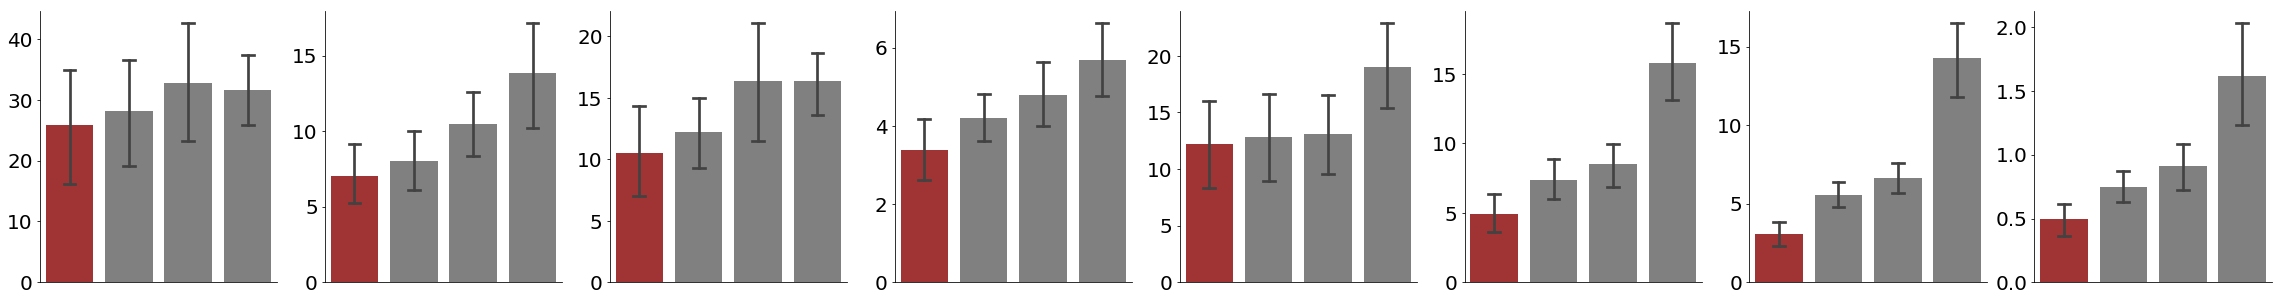

In [140]:
plot_features(Middle_Class_cell_properties)

## IOU analysis

In [346]:
DC_list = [compute_DC(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_withval_edge[:1600, 1600:3200, 1]), \
compute_DC(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_withval_unet_edge[:1600, 1600:3200, 1]), \
compute_DC(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_withval_unet[:1600, 1600:3200, 1]), \
compute_DC(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_20epo[:1600, 1600:3200, 1])]
DC_list 

[0.9507282599668595, 0.91108934247616, 0.9110812852900215, 0.8215876287795947]

In [7]:
IOU_list = [compute_IOU(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_withval_edge[:1600, 1600:3200, 1]), \
compute_IOU(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_withval_unet_edge[:1600, 1600:3200, 1]), \
compute_IOU(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_withval_unet[:1600, 1600:3200, 1]), \
compute_IOU(D4_T2_annotation_img[:1600, 1600:3200, 1], manual_4img_20epo[:1600, 1600:3200, 1])]
IOU_list

[0.9077978606237082,
 0.8378377385522473,
 0.8377917289771328,
 0.6975751111111111]

In [ ]:
ind= np.array([0.8, 1.9, 3, 3.8])
plt.style.use('bmh')
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.barplot(ind, IOU_list, palette = ['firebrick', 'gray', 'gray', 'gray'])
ax.set_ylim([0, 1])
plt.xticks(ind - 1, ['ResAtt-Unet_EE', 'Unet_EE', 'Unet', 'ResAtt-Unet'], fontsize = 20, rotation = 60);
plt.yticks(fontsize = 20);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
print(classification_report(D4_T2_annotation_img[1600:, :1600, 1].flatten(), manual_4img_20epo[1600:, :1600, 1].flatten()))

In [98]:
print(classification_report(D4_T2_annotation_img[:1600, 1600:3200, 1].flatten(), manual_4img_withval_edge[:1600, 1600:3200, 1].flatten()), \
classification_report(D4_T2_annotation_img[:1600, 1600:3200, 1].flatten(), manual_4img_withval_unet_edge[:1600, 1600:3200, 1].flatten()), \
classification_report(D4_T2_annotation_img[:1600, 1600:3200, 1].flatten(), manual_4img_withval_unet[:1600, 1600:3200, 1].flatten()), \
classification_report(D4_T2_annotation_img[:1600, 1600:3200, 1].flatten(), manual_4img_20epo[:1600, 1600:3200, 1].flatten()))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99   2301972
         1.0       0.97      0.93      0.95    258028

   micro avg       0.99      0.99      0.99   2560000
   macro avg       0.98      0.96      0.97   2560000
weighted avg       0.99      0.99      0.99   2560000
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99   2301972
         1.0       0.94      0.88      0.91    258028

   micro avg       0.98      0.98      0.98   2560000
   macro avg       0.96      0.94      0.95   2560000
weighted avg       0.98      0.98      0.98   2560000
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99   2301972
         1.0       0.91      0.91      0.91    258028

   micro avg       0.98      0.98      0.98   2560000
   macro avg       0.95      0.95      0.95   2560000
weighted avg       0.98      0.98      0.98   2560000
               preci

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.97665485 0.02334515]
 [0.29560524 0.70439476]]


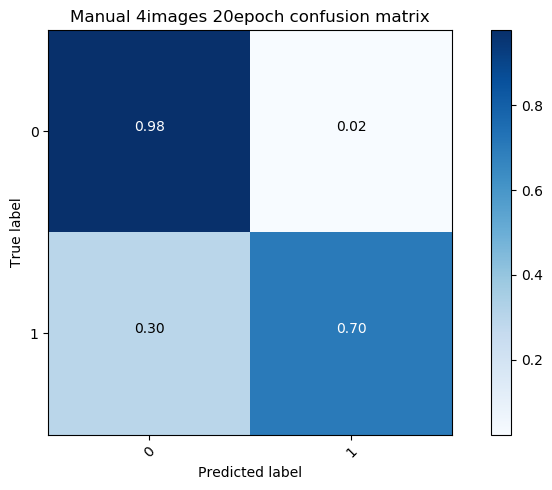

In [90]:
matrix = confusion_matrix(D4_T2_annotation_img[1600:, :1600, 1].flatten(), manual_4img_20epo[1600:, :1600, 1].flatten());
plt.figure()
plt.style.use('default')
plt.rcParams['figure.figsize']= [8,5]

plot_confusion_matrix(matrix, classes=['0', '1'], normalize=True, title='Manual 4images 20epoch confusion matrix')